In [4]:
from chop.nn.quantizers import *
import numpy as np
import torch
import matplotlib.pyplot as plt

In [5]:
EXPONENT_WIDTH = 4
MANTISSA_WIDTH = 5

MAX_VALUE = 15

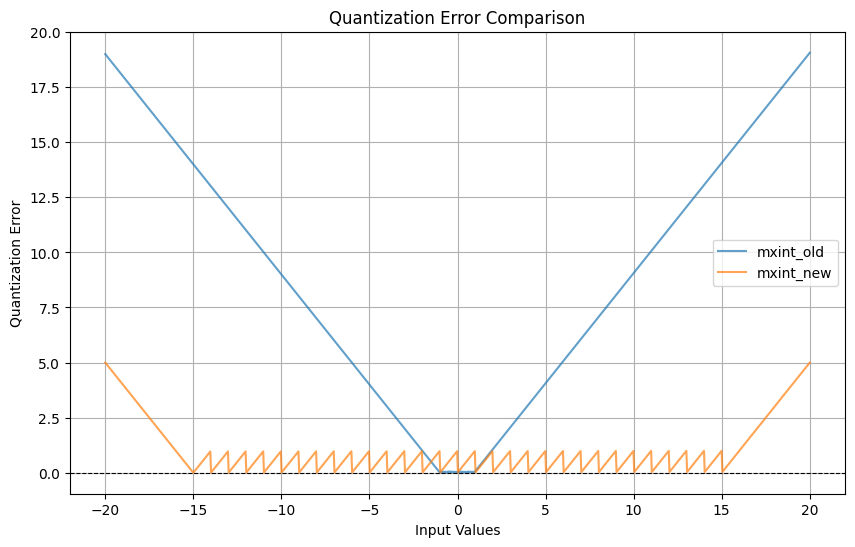

In [6]:
X = torch.linspace(-20, 20, 1000).view(-1, 1)

mxint_old = (mxint_old_quantizer(X, MANTISSA_WIDTH, EXPONENT_WIDTH, [1], skip_first_dim=False) - X).abs()
mxint_new = (mxint_quantizer(X, MANTISSA_WIDTH, EXPONENT_WIDTH, [1], skip_first_dim=False) - X).abs()

plt.figure(figsize=(10, 6))
plt.plot(X.numpy(), mxint_old.numpy(), label='mxint_old', alpha=0.7)
plt.plot(X.numpy(), mxint_new.numpy(), label='mxint_new', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Quantization Error Comparison')
plt.xlabel('Input Values')
plt.ylabel('Quantization Error')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import pandas as pd

data = {
    'x': X.numpy().flatten(),
    'mxint_old': mxint_old.numpy().flatten(),
    'mxint_new': mxint_new.numpy().flatten()
}

df = pd.DataFrame(data)

df.to_csv('mxint_data.csv', index=False)